<a href="https://colab.research.google.com/github/savvyguru/MachineLearning/blob/master/k_neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **k-nearest neighbour:**
Used for and classification problems.
The idea is to classify test data based on the k number of datapoints that are closest to that test datapoint. Distance can be manhattan, hammming, euclidean. The issue with k-nearest neighbour classification is that it overfits easily.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

## **Set number of neighbours**
Play with the k-value and observe the shape of the colormap

In [0]:
n_neighbors = 20

# import some data to play with
wine = datasets.load_wine()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = wine.data[:, :2]
y = wine.target

## **Create color map:**
*   np.meshgrid create a rectangular blob of paint to colour the grid
*   uniform weights means that all neighbour weigh equally
*   distance weight means weight of neighbour is inversely proportional to distance




In [0]:
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

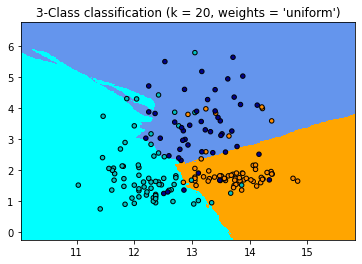

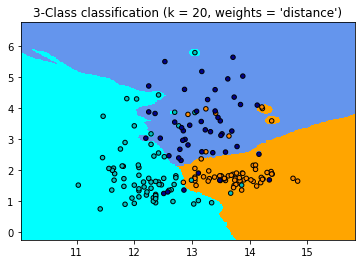

In [27]:
h = .02  # distance mesg grid moves by
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

In [0]:

plt.show()